/tmp/ipython-input-2065602054.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


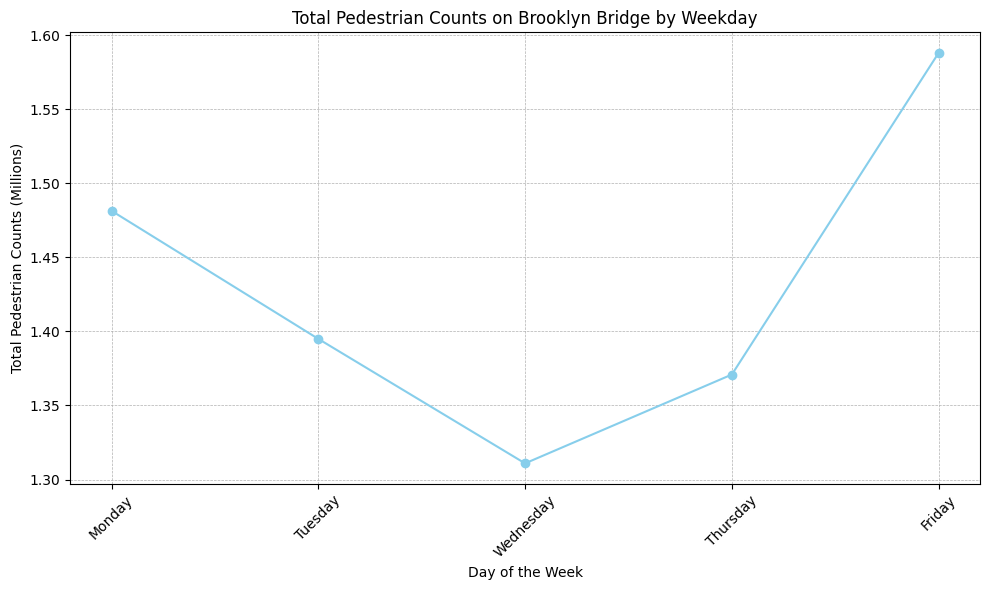

In [1]:
# 1

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project_20251014.csv")

# Clean 'Pedestrians' and convert to numeric
df['Pedestrians'] = df['Pedestrians'].astype(str).str.replace(',', '', regex=False)
df['Pedestrians'] = pd.to_numeric(df['Pedestrians'], errors='coerce')
df.dropna(subset=['Pedestrians'], inplace=True)

# Convert 'hour_beginning' to datetime
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

# Create a 'day_of_week' column (Monday=0, Sunday=6)
df['day_of_week'] = df['hour_beginning'].dt.dayofweek

# Filter for weekdays (Monday to Friday, 0 to 4)
weekday_df = df[df['day_of_week'] <= 4].copy()

# Aggregate: Group by 'day_of_week' and sum 'Pedestrians'
daily_counts = weekday_df.groupby('day_of_week')['Pedestrians'].sum().reset_index()

# Prepare for plotting: map the day numbers to day names and convert counts to millions
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
daily_counts['day_name'] = daily_counts['day_of_week'].map(lambda x: day_names[x])
daily_counts['Pedestrians_Millions'] = daily_counts['Pedestrians'] / 1000000

# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(daily_counts['day_of_week'], daily_counts['Pedestrians_Millions'], marker='o', linestyle='-', color='skyblue')

# Set x-axis ticks and labels
plt.xticks(daily_counts['day_of_week'], daily_counts['day_name'], rotation=45)

plt.title('Total Pedestrian Counts on Brooklyn Bridge by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Total Pedestrian Counts (Millions)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save the plot
plt.savefig('weekday_pedestrian_counts_line_graph_millions.png')

In [2]:
# 2

import pandas as pd

# The file path for the uploaded CSV file
file_path = "Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project_20251014.csv"

# 1. Load the dataset
df = pd.read_csv(file_path)

# 2. Data Cleaning and Type Conversion
# Clean commas from the 'Pedestrians' column and convert to numeric
df['Pedestrians'] = df['Pedestrians'].astype(str).str.replace(',', '', regex=False)
df['Pedestrians'] = pd.to_numeric(df['Pedestrians'], errors='coerce')

# Convert 'hour_beginning' to datetime type
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

# 3. Filter data for the year 2019
df_2019 = df[df['hour_beginning'].dt.year == 2019].copy()

# 4. Drop rows with missing values in the relevant columns for analysis
df_2019.dropna(subset=['Pedestrians', 'temperature', 'precipitation', 'weather_summary'], inplace=True)

# --- Part 1: Numerical Correlation Analysis (Correlation Matrix) ---

print("--- 2019 Numerical Variables Correlation Matrix ---")
# Select numerical columns for correlation analysis
numerical_data = df_2019[['Pedestrians', 'temperature', 'precipitation']]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr(method='pearson')

# Print the correlation matrix using Markdown format for readability
print(correlation_matrix.to_markdown(floatfmt=".3f"))


# --- Part 2: Analysis of Weather Summary Influence on Pedestrian Counts ---

print("\n--- 2019 Average Pedestrian Counts Sorted by Weather Summary ---")
# Group by 'weather_summary' and calculate the mean pedestrian count
weather_influence = df_2019.groupby('weather_summary')['Pedestrians'].mean().reset_index()

# Sort by average pedestrian count in descending order
weather_influence_sorted = weather_influence.sort_values(by='Pedestrians', ascending=False)

# Rename columns for clear output and print the resulting table
weather_influence_sorted.rename(
    columns={'weather_summary': 'Weather Summary', 'Pedestrians': 'Average Pedestrian Count (Per Hour)'},
    inplace=True
)
print(weather_influence_sorted.to_markdown(index=False, floatfmt=".1f"))

/tmp/ipython-input-1657795963.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


--- 2019 Numerical Variables Correlation Matrix ---
|               |   Pedestrians |   temperature |   precipitation |
|:--------------|--------------:|--------------:|----------------:|
| Pedestrians   |         1.000 |         0.359 |          -0.105 |
| temperature   |         0.359 |         1.000 |           0.002 |
| precipitation |        -0.105 |         0.002 |           1.000 |

--- 2019 Average Pedestrian Counts Sorted by Weather Summary ---
| Weather Summary     |   Average Pedestrian Count (Per Hour) |
|:--------------------|--------------------------------------:|
| partly-cloudy-day   |                                1574.1 |
| clear-day           |                                1382.2 |
| wind                |                                 679.0 |
| cloudy              |                                 543.2 |
| rain                |                                 229.8 |
| snow                |                                 222.6 |
| fog                 |       

In [3]:
# 3

import pandas as pd

# Load the dataset
df = pd.read_csv("Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project_20251014.csv")

# 1. Data Cleaning
df['Pedestrians'] = df['Pedestrians'].astype(str).str.replace(',', '', regex=False)
df['Pedestrians'] = pd.to_numeric(df['Pedestrians'], errors='coerce')
df.dropna(subset=['Pedestrians'], inplace=True)
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')
df.dropna(subset=['hour_beginning'], inplace=True)

# 2. Implement the custom categorization function
def categorize_time(hour):
    if 6 <= hour <= 11:
        return 'Morning' # 6 AM to 11:59 AM
    elif 12 <= hour <= 16:
        return 'Afternoon' # 12 PM to 4:59 PM
    elif 17 <= hour <= 21:
        return 'Evening' # 5 PM to 9:59 PM
    else:
        return 'Night' # 10 PM to 5:59 AM (22, 23, 0, 1, 2, 3, 4, 5)

# 3. Apply the function to create the new column
df['hour'] = df['hour_beginning'].dt.hour
df['time_of_day'] = df['hour'].apply(categorize_time)

# 4. Analyze pedestrian activity patterns throughout the day
activity_patterns = df.groupby('time_of_day')['Pedestrians'].mean().reset_index()

# Define the desired order for the categories and sort the results
time_order = ['Night', 'Morning', 'Afternoon', 'Evening']
activity_patterns['time_of_day'] = pd.Categorical(
    activity_patterns['time_of_day'], categories=time_order, ordered=True
)
activity_patterns_sorted = activity_patterns.sort_values('time_of_day')

# Display the results
activity_patterns_sorted.rename(
    columns={'time_of_day': 'Time of Day', 'Pedestrians': 'Average Pedestrian Count (Per Hour)'},
    inplace=True
)
print(activity_patterns_sorted.to_markdown(index=False, floatfmt=".1f"))

/tmp/ipython-input-1013725874.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')


| Time of Day   |   Average Pedestrian Count (Per Hour) |
|:--------------|--------------------------------------:|
| Night         |                                  31.1 |
| Morning       |                                 614.5 |
| Afternoon     |                                1749.5 |
| Evening       |                                 761.6 |
